In [1]:
#import libraries and modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('train.csv')


In [9]:
# Convert to float (in case some values aren't numeric)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Calculate median (excluding NaN values)
age_median = df['Age'].median()

# Fill missing values
df['Age'] = df['Age'].fillna(age_median)

In [6]:
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)


In [10]:
#fixes category column ,gives numbers to the sex category ie 0 or 1
le_sex = LabelEncoder()  
df['Sex'] = le_sex.fit_transform(df['Sex'])

In [11]:
#same like did for sex
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

In [13]:
#seperate features and labels
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
X = df[features]
y = df['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model=LogisticRegression(max_iter=200)

In [17]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [22]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



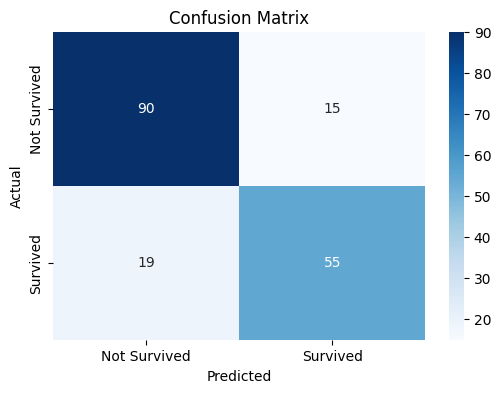

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

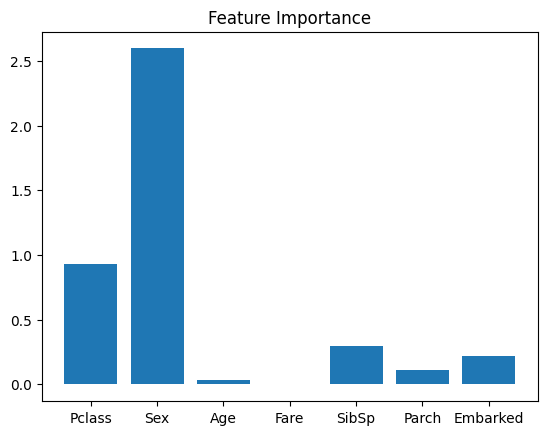

In [21]:
# Feature importance
importance = model.coef_[0]
plt.bar(features, -importance)
plt.title('Feature Importance')
plt.show()
